## World Happiness Report

In [28]:
#importing required liberary

#data lib
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LinearRegression

#metrices

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#save

import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading dataset

data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
#No null value in data set
data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [4]:
#No use of columns country name & rank & region so removing
data.drop(columns=['Country','Happiness Rank','Region'],inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [6]:
data.nunique()

Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [7]:
data.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


My Observation:
1-No use of columns country name,rank,Region so removing.
2-No Null values.
3-Need to predict Happiness score which is continious data so regression problem.
4-1 object data type('Region')-will check if its correlated with target then encode it.
5-Multicollinearity in (Economy (GDP per Capita) & Health (Life Expectancy))-as its simple model adding up all values so not removing it even data is very less.
6-There is some skewness in few features but as we have very less dataset so keeping it as its.

In [8]:
data.shape

(158, 9)

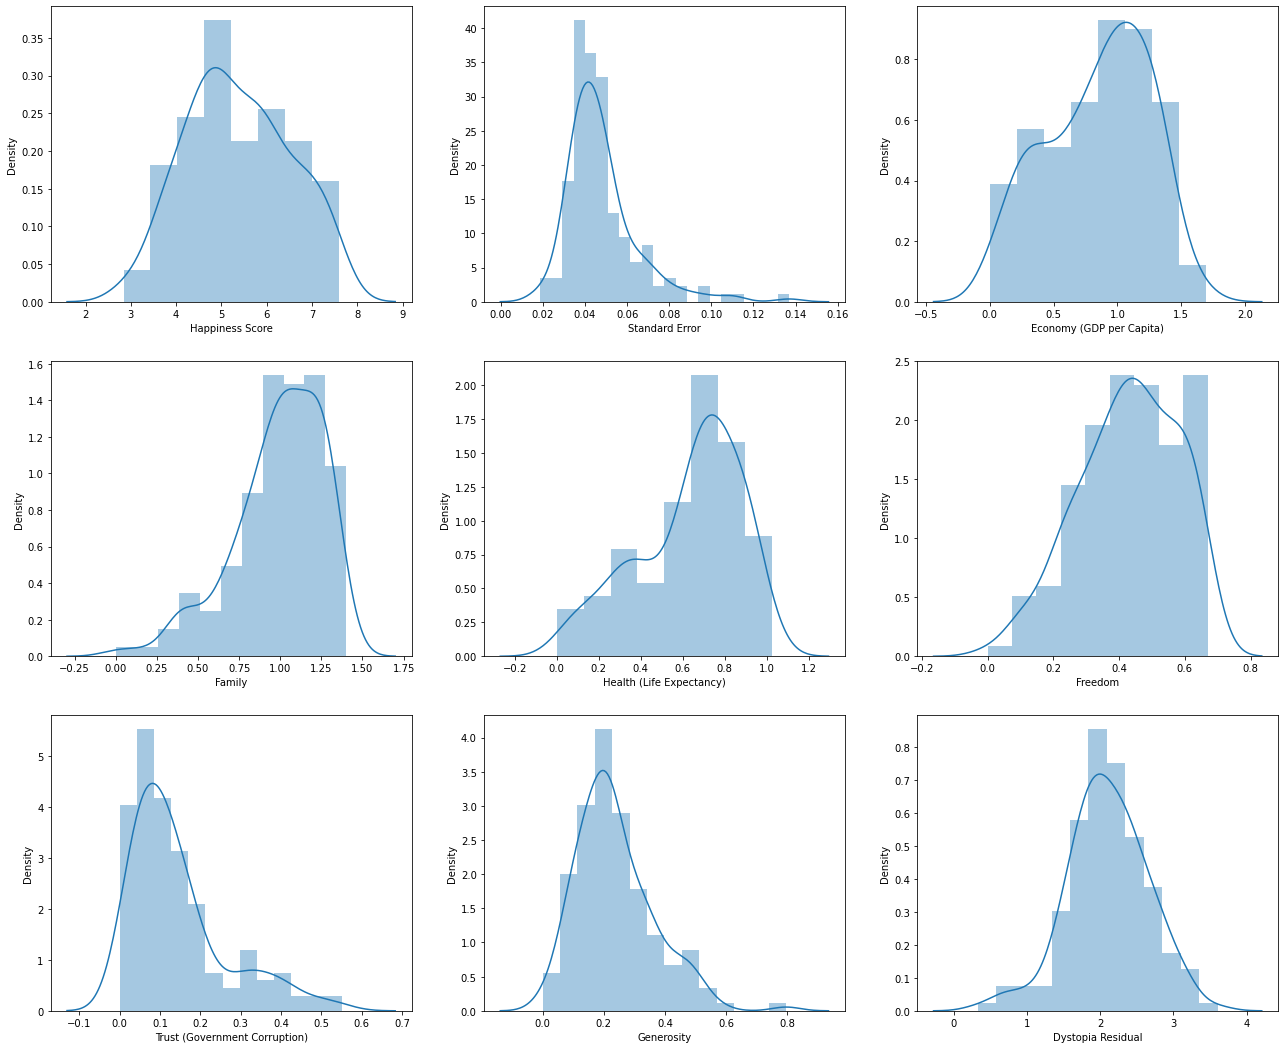

In [31]:
#Testing for data distribution

plt.figure(figsize=(22,25))
plotnumber=1

for col in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[col])

    plotnumber+=1

plt.show()

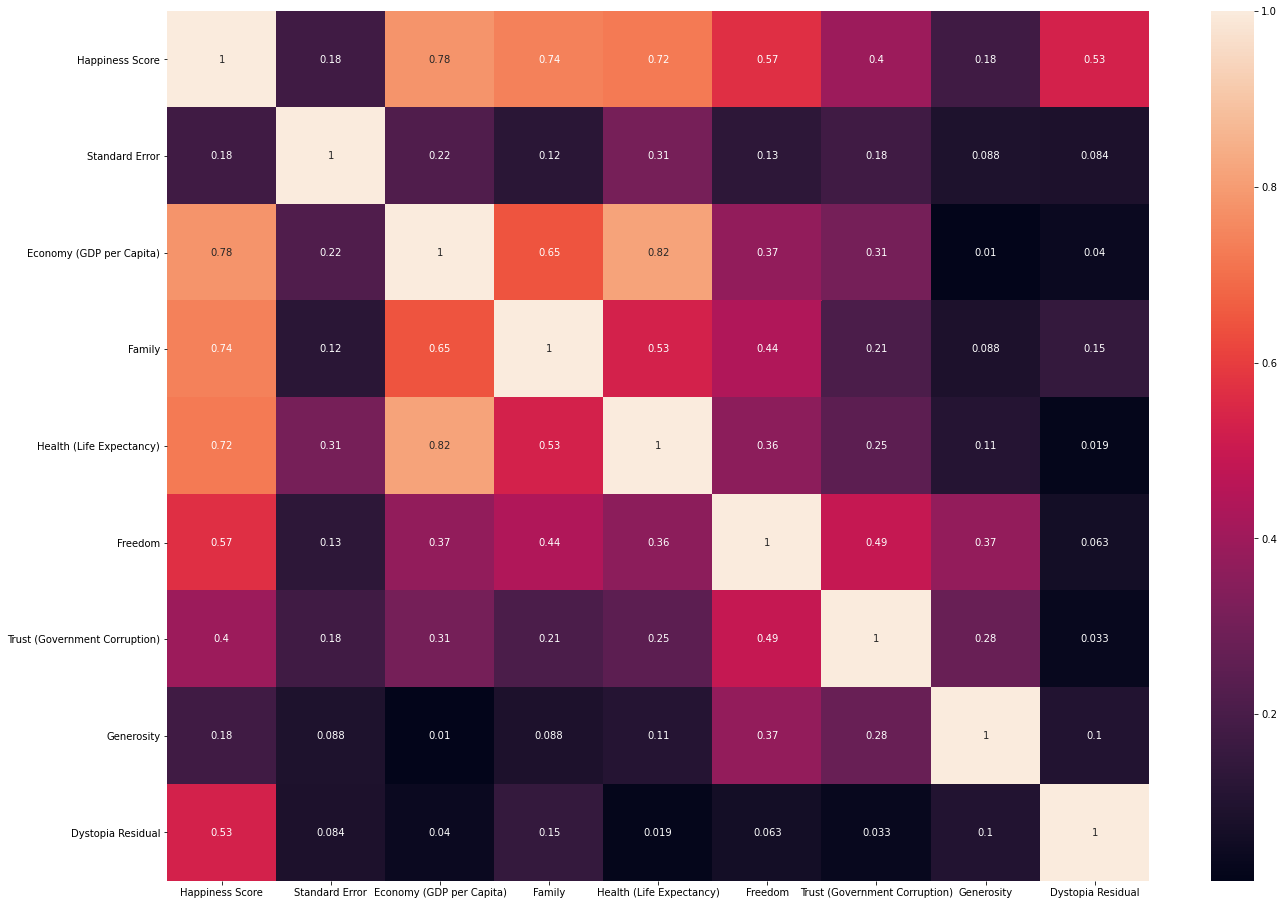

In [10]:
#EDA

df_corr=data.corr().abs()

plt.figure(figsize=(22,16))
           
sns.heatmap(df_corr,annot=True)
plt.show()

In [11]:
X=data.drop(columns=['Happiness Score'])
y=data['Happiness Score']

In [12]:
#Scaling
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [13]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=313)

In [14]:
lr=LinearRegression()

In [15]:
#model training
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
#training score
lr.score(X_train,y_train)

0.999999940073829

In [17]:
# check test data result

y_pred=lr.predict(X_test)


In [18]:
#model evaluation

print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

0.00024056435436077274
8.144914650794848e-08
0.00028539296856781263
0.999999940402003


In [19]:
#model seems perfact but still check for overfitting.
#Regularization
#LASSO

from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

lassocv=LassoCV(alphas=None,max_iter=100,normalize=True)
lassocv.fit(X_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [20]:
alpha=lassocv.alpha_
alpha

8.033200371568794e-05

In [21]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=8.033200371568794e-05)

In [22]:
#Model not overfitted as getting same score
lasso_reg.score(X_test,y_test)

0.9999999206567788

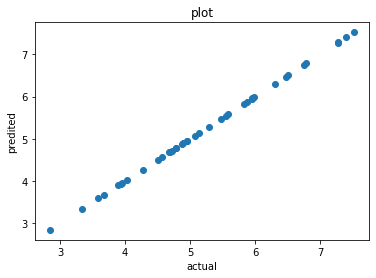

In [23]:
#testing actual vs predicted & its perfactly matching(predicting with almost 100% accuracy)

import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.title('plot')
plt.xlabel('actual')
plt.ylabel('predited')
plt.show()

In [37]:
#Save model
filename='World_happiness.pickle'
pickle.dump(lr, open(filename,'wb'))

### Completed